## Predicting Net hourly electrical energy on Combined Cycle Power Plant with Deep Learning (ANN) 
<b> Predicting the Net hourly electrical energy based on the features from the enery.xlsx Dataset by using Deep Learning (ANN). This is a Regression problem. 
    
<b> Goal is to make an Artificial Neural Network that can predict Net hourly electrical energy, based on features from the enery.xlsx Dataset. 
    
<b> The algorithms included Artificial Neural Network (ANN).

## Step - 1 : Business Problem Understanding
<b> Our Business problem which I have chosen for this tutorial is a Regression problem wherein we have a dataset in which there are details of a Combined Cycle Power Plant and the target variable is a 'Energy' based on the Temperature, Ambient Pressure, Relative Humidity and Exhaust Vacuum we need to predict the Net hourly electrical energy.
    
    
<b> The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Average Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

import warnings
warnings.simplefilter("ignore")

## Step - 2 : Data Understanding
### 2.1 Data Collection/Loading the dataset
<b>Load the dataset by using read_excel() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_excel("energy.xlsx")

# Display the first 5 lines using the head() method.
df.head()

,Temperature,Pressure,Humidity,Vaccum,Energy
0,14.96,1024.07,73.17,41.76,463.26
1,25.18,1020.04,59.08,62.96,444.37
2,5.11,1012.16,92.14,39.40,488.56
3,20.86,1010.24,76.64,57.32,446.48
4,10.82,1009.23,96.62,37.50,473.90


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(9568, 5)

<b> From the output, we can see that the table contains 9568 rows and 5 columns.

<b> We can use the info() method to output some general information about the dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  9568 non-null   float64
 1   Pressure     9568 non-null   float64
 2   Humidity     9568 non-null   float64
 3   Vaccum       9568 non-null   float64
 4   Energy       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


<b> float64 is the data type of our features. We see that all features are numeric (features are float64). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 9568 observations, the same number of rows we saw before with shape.
    
<b> Here 5 variables or features (columns) are there, all features are numeric (features are float64). Features consist of hourly average ambient variables:
    
- **Temperature:** In the range 1.81°C and 37.11°C,
- **Pressure:** In the range 992.89-1033.30 milibar,
- **Humidity:** In the range 25.56% to 100.16%
- **Vacuum:** In teh range 25.36-81.56 cm Hg
- **Net hourly electrical energy output (Energy):** 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. 
    
    

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,Temperature,Pressure,Humidity,Vaccum,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,1013.259078,73.308978,54.305804,454.365009
std,7.452473,5.938784,14.600269,12.707893,17.066995
min,1.810000,992.890000,25.560000,25.360000,420.260000
25%,13.510000,1009.100000,63.327500,41.740000,439.750000
50%,20.345000,1012.940000,74.975000,52.080000,451.550000
75%,25.720000,1017.260000,84.830000,66.540000,468.430000
max,37.110000,1033.300000,100.160000,81.560000,495.760000


<b> Checking the correlation of every pair of features (and the Energy variable), and visualize the correlations using a heatmap.

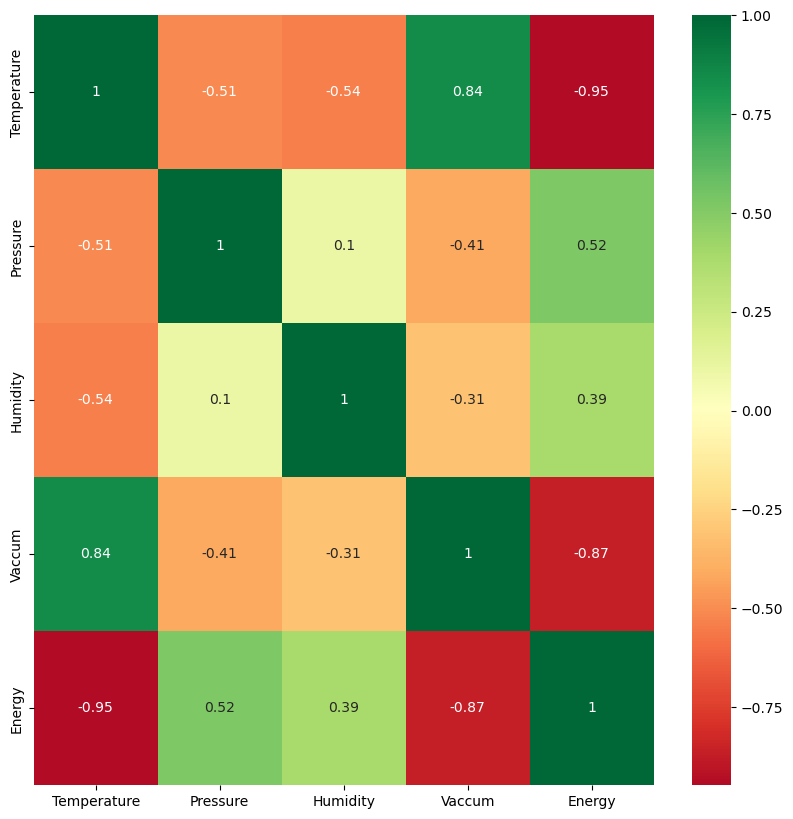

In [6]:
# calculate the correlation between variables and store it in "corr" object.
corr = df.corr()

plt.figure(figsize=(10,10))                                   # Create the figure
sns.heatmap(corr, annot=True, cmap='RdYlGn',center=0)         # plotting correlation heatmap.

# displaying heatmap
plt.show()

<b> As seen above there is strong positive correlation between Energy and Pressure while very strong negative correlation between Energy and Temperature or Vacuum.

### Data Visualization:
<b> Plotting the Histogram of the Target Column, i.e. "Energy"

Text(0.5, 1.0, 'Histogram of the Target Column')

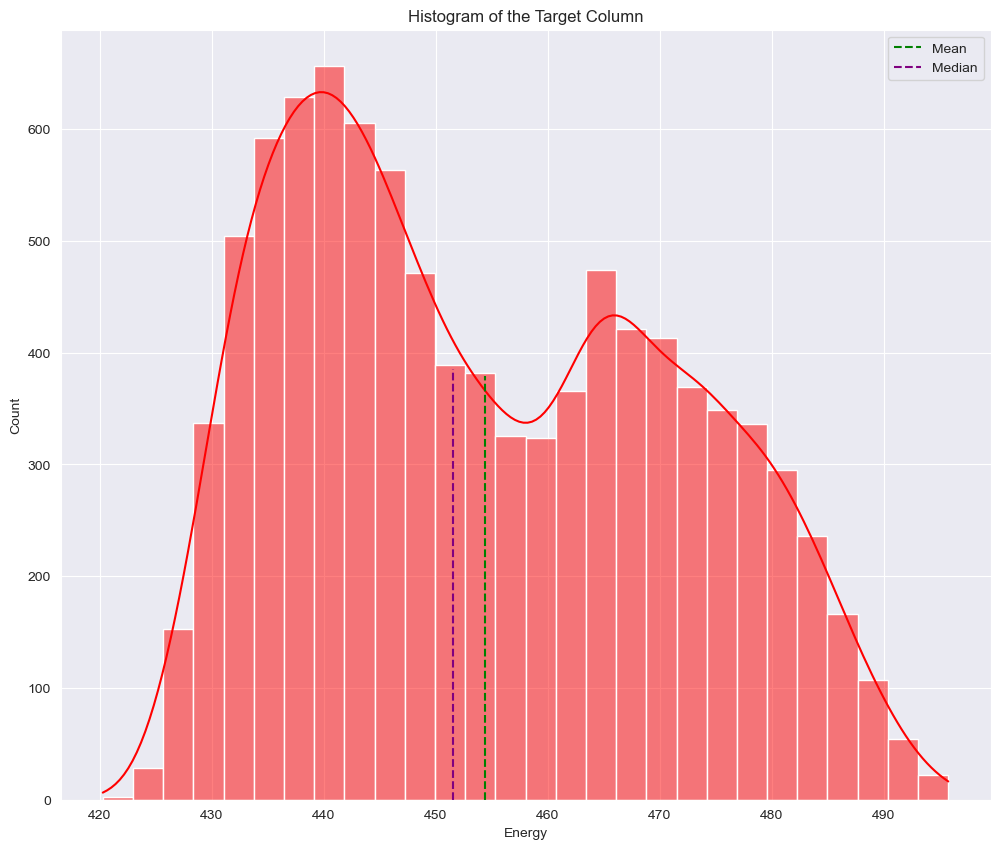

In [10]:
plt.figure(figsize=(12,10))                                          # Create the figure
sns.histplot(data=df,x="Energy",color="red",kde=True)                # Plot the histogram 
plt.axvline(x=df["Energy"].mean(),ymax=0.55,color="green"            # Draw the Mean line with green color
                                ,linestyle='--',label="Mean")
plt.axvline(x=df["Energy"].median(),ymax=0.56,color="purple",        # Draw the Mean line with purple color    
                               linestyle='--',label="Median")
plt.legend()                                                         # Dispay the legends
plt.title("Histogram of the Target Column")                          # title of the plot

<b> Here I am using Pairplot to visualizes given data to find the relationship between them.

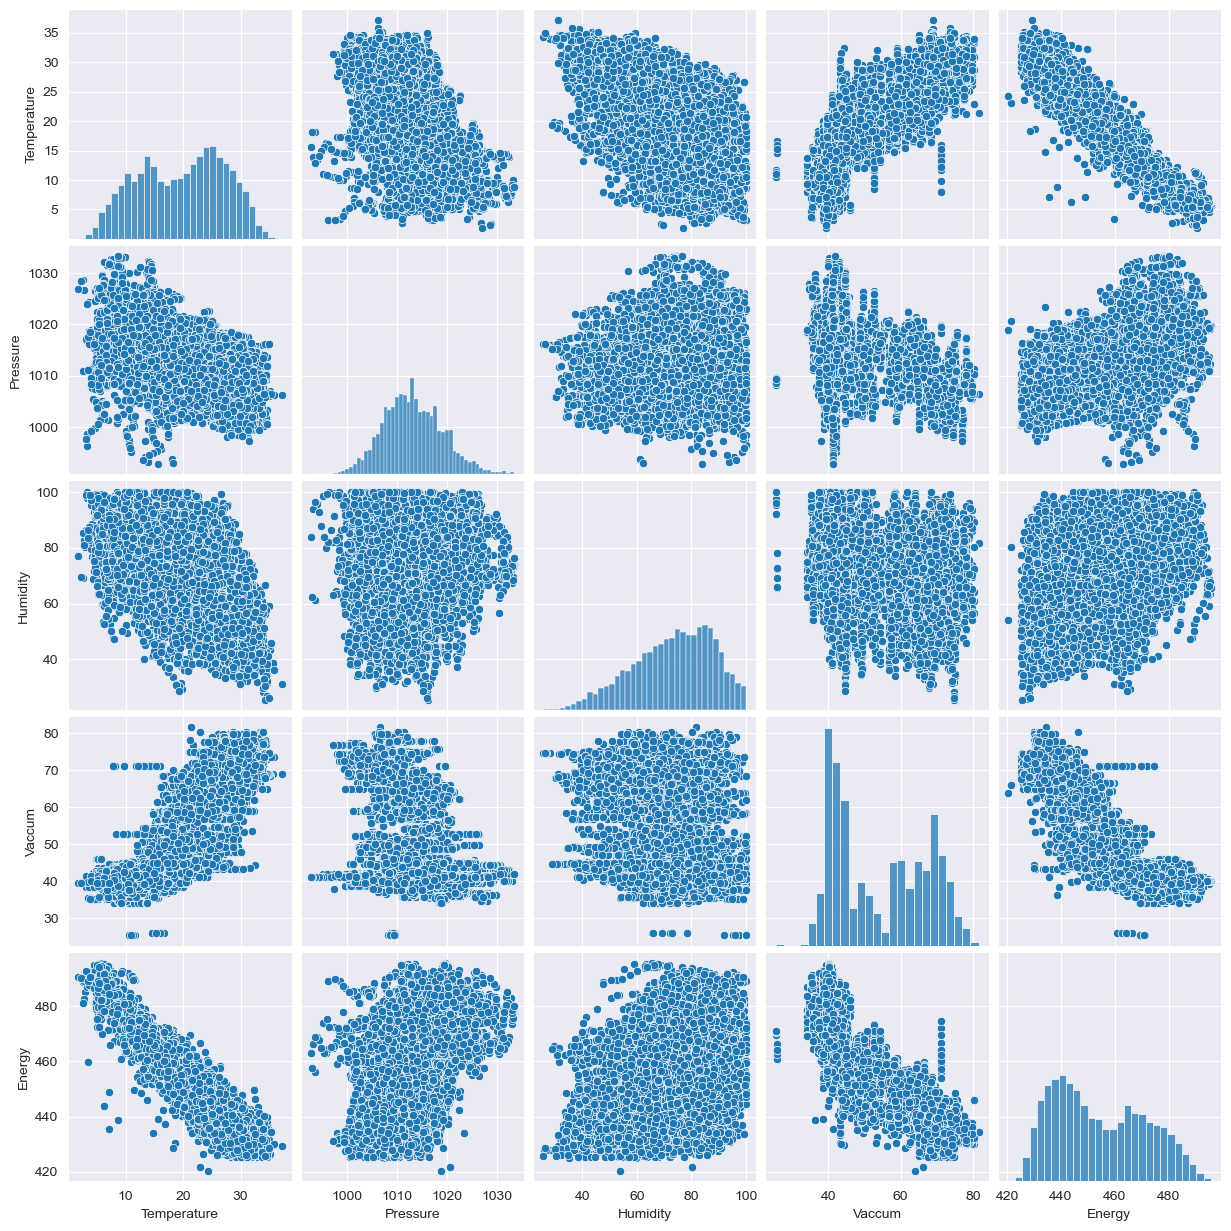

In [11]:
# plot the pairplot.
sns.pairplot(df)

# Display all figures.
plt.show()

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [12]:
# Check the missing values records.
df.isnull().sum()

Temperature    0
Pressure       0
Humidity       0
Vaccum         0
Energy         0
dtype: int64

<b> In the above, we can see that there is no missing values.
    

### 3.3 Train/Test Split
<b> Creating independent variables as "X" variable: all variables excluding "Energy" variable. And dependent variable "Energy" as "y" variable.

In [13]:
# Create x and y variables.
X = df.drop('Energy', axis=1)     # independent variables
y = df["Energy"]                  # dependent variable

<b> Split the dataset further into train and test sets.

In [14]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of X_train, X_test, y_train, y_test

In [15]:
X_train.shape, X_test.shape

((7654, 4), (1914, 4))

In [16]:
y_train.shape, y_test.shape

((7654,), (1914,))

### 3.4 Apply feature scaling to train and test sets of independent features.
<b> Feature Scaling refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale.
    
<b> Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range.
    
<b> So here we are applying feature scaling to train and test sets of independent features by using StandardScaler().

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler           # importing the StandardScaler() class
sc = StandardScaler()                                      # initializing the StandardScaler() class as "sc"
X_train = sc.fit_transform(X_train)                        # Applying the StandardScaler() class on X_train 
X_test = sc.transform(X_test)                              # Applying the StandardScaler() class on X_test

## 4. Modelling / Building Artificial Neural Network (ANN)

<b> sequential model to initialize our ann and dense module to build the layers.
    
<b> The Sequential API is a framework for creating models based on instances of the sequential() class. The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output. Additional layers can be created and added to the model. Things in sequence, or regular order, are arranged sequentially.
    
<b> Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons. The parameters of Dense as:
    
    
- input_dim: dimensionality of the input space.  
    
    
- units: Positive integer, dimensionality of the output space.
    
    
- activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
    
    
- use_bias: Boolean, whether the layer uses a bias vector.
    
    
- kernel_initializer: Initializer for the kernel weights matrix.
    
    
 

In [19]:
# sequential model to initialize our ann and dense module to build the layers

# importing Sequential clas from keras.models library.
from keras.models import Sequential   

# importing Dense clas from keras.layers library.
from keras.layers import Dense

# initialize the ANN - Sequential class as 'ann'
ann = Sequential()

In [20]:
# Adding the input layer and the first hidden layer
ann.add(Dense(input_dim=4, units=6, kernel_initializer='uniform', activation='relu'))

In [21]:
# Adding the second hidden layer
ann.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [22]:
# Adding the output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))

<b> Compiling the ANN:

The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase. The parameters of compile as:

- **Loss:** In machine learning, Loss function is used to find error or deviation in the learning process. Keras requires loss function during model compilation process. Keras provides quite a few loss function in the losses module and they are as follows −

    mean_squared_error                                                                                       
    mean_absolute_error                                                                                             
    binary_crossentropy, etc                                                                                       
    
    
- **Optimizer:** In machine learning, Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module, optimizers and they are as follows:
    
    SGD − Stochastic gradient descent optimizer.                                                                               Adam − Adam optimizer.                                                                                         
    RMSprop − RMSProp optimizer. etc                                                                                  
    
    
- **Metrics:** In machine learning, Metrics is used to evaluate the performance of your model. It is similar to loss function, but not used in training process. Keras provides quite a few metrics as a module, metrics and they are as follows

   accuracy                                                                                                     
   binary_accuracy                                                                                                   
   categorical_accuracy                                                                                                
    

In [23]:
# Compiling the ANN
ann.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 205887.2656
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 194464.6094
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 157666.4531
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 101154.2969
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 51959.0117
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 28030.8145
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 20150.2031
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 16441.7012
Epoch 9/100
240/240 [==============================] - 1s 2ms/step - loss: 13374.9805
Epoch 10/100
240/240 [==============================] - 1s 2ms/step - loss: 10442.0400
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 7702.0249
Epoch 12/100
240/240 [===========================

240/240 [==============================] - 0s 2ms/step - loss: 21.3352
Epoch 99/100
240/240 [==============================] - 0s 2ms/step - loss: 21.4312
Epoch 100/100
240/240 [==============================] - 0s 2ms/step - loss: 21.4757


<b> In the above, we have Fitted the ANN to the Training set. In the we have used 'batch_size' and 'epochs' as:

- **batch_size:** Number of samples per gradient update. default to 32.
       
    
- **epochs:** Number of epochs to train the model. An epoch is an iteration over the entire `x` and `y` data provided.

## 5. Prediction and Model Evaluation
<b> Predicting the Test set results

In [25]:
# Predicting the Train and Test set results
ypred_train = ann.predict(X_train)             # Prediction on train data
ypred_test = ann.predict(X_test)               # Prediction on test data

60/60 [==============================] - 0s 2ms/step


## Model Evaluation
<b> Here we are testing the mean_squared_error and R2_score.

In [26]:
# Calculate the mean_squared_error of Train and Test results.

# importing the mean_squared_error class from sklearn.metrics library
from sklearn.metrics import mean_squared_error

print("MSE for the training data:", mean_squared_error(y_train, ypred_train))    
print("MSE for the test data:", mean_squared_error(y_test, ypred_test))

MSE for the training data: 21.090770390148766
MSE for the test data: 19.801116318036254


In [27]:
# Calculate the accuracy(r2_score) of Train and Test results.

# importing the r2_score class from sklearn.metrics library
from sklearn.metrics import r2_score

print("R2 for the training data:", r2_score(y_train, ypred_train))    
print("R2 for the test data:", r2_score(y_test, ypred_test))

R2 for the training data: 0.927504109624615
R2 for the test data: 0.9323010603705036


<b> As we can see from the above, we have got good mean_squared_error and r2_score. Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets. We got an accuracy of 93.23% with this model.